<a href="https://colab.research.google.com/github/javohir-ergashboyev/ML-projects/blob/main/Decision_Tree_and_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import confusion_matrix, classification_report

In [5]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv"
df=pd.read_csv(url)
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [7]:
encoder=LabelEncoder()
df['Sex']=encoder.fit_transform(df['Sex'].values)
df['BP']=encoder.fit_transform(df['BP'].values)
df['Cholesterol']=encoder.fit_transform(df['Cholesterol'].values)
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,drugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,drugY


In [10]:
X=df[['Age','Sex','BP','Cholesterol','Na_to_K']].values
X[:5]

array([[23.   ,  0.   ,  0.   ,  0.   , 25.355],
       [47.   ,  1.   ,  1.   ,  0.   , 13.093],
       [47.   ,  1.   ,  1.   ,  0.   , 10.114],
       [28.   ,  0.   ,  2.   ,  0.   ,  7.798],
       [61.   ,  0.   ,  1.   ,  0.   , 18.043]])

In [11]:
Y=encoder.fit_transform(df['Drug'].values)
Y

array([4, 2, 2, 3, 4, 3, 4, 2, 4, 4, 2, 4, 4, 4, 3, 4, 3, 0, 2, 4, 4, 4,
       4, 4, 4, 4, 4, 3, 4, 4, 3, 1, 3, 4, 3, 3, 0, 3, 3, 3, 4, 1, 4, 3,
       3, 3, 0, 2, 4, 4, 4, 3, 4, 4, 1, 2, 1, 4, 3, 4, 4, 0, 4, 3, 1, 4,
       0, 3, 4, 4, 1, 4, 3, 4, 4, 4, 0, 4, 0, 3, 1, 3, 2, 0, 2, 1, 3, 4,
       4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 0, 0, 2, 3, 4, 3, 3, 4, 1, 4,
       0, 3, 3, 3, 3, 4, 3, 3, 0, 4, 4, 4, 4, 4, 1, 4, 4, 3, 4, 3, 4, 4,
       3, 4, 4, 3, 1, 0, 1, 3, 0, 4, 1, 4, 0, 3, 3, 0, 3, 2, 0, 1, 3, 3,
       4, 2, 0, 4, 2, 3, 3, 1, 3, 4, 4, 4, 4, 3, 4, 0, 3, 3, 4, 4, 0, 4,
       0, 4, 4, 4, 4, 3, 3, 4, 4, 4, 1, 0, 4, 4, 4, 0, 4, 2, 4, 2, 2, 3,
       3, 3])

In [12]:
xTrain,xTest,yTrain,yTest=train_test_split(X,Y, test_size=0.2,random_state=5)

In [13]:
tree_model=DecisionTreeClassifier()
tree_model.fit(xTrain,yTrain)

DecisionTreeClassifier()

In [14]:
yPredict=tree_model.predict(xTest)
print(classification_report(yTest,yPredict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00        22

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



<Axes: >

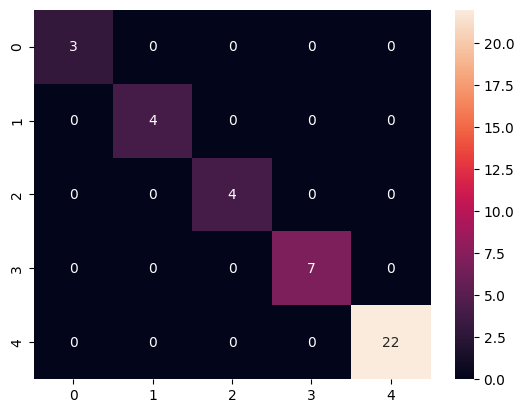

In [16]:
sns.heatmap(confusion_matrix(yTest,yPredict), annot=True)

In [17]:
predict=cross_val_predict(estimator=tree_model, X=X,y=Y, cv=5)
print(classification_report(Y, predict))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        23
           1       1.00      0.88      0.93        16
           2       1.00      1.00      1.00        16
           3       1.00      0.98      0.99        54
           4       0.99      1.00      0.99        91

    accuracy                           0.98       200
   macro avg       0.98      0.97      0.98       200
weighted avg       0.99      0.98      0.98       200



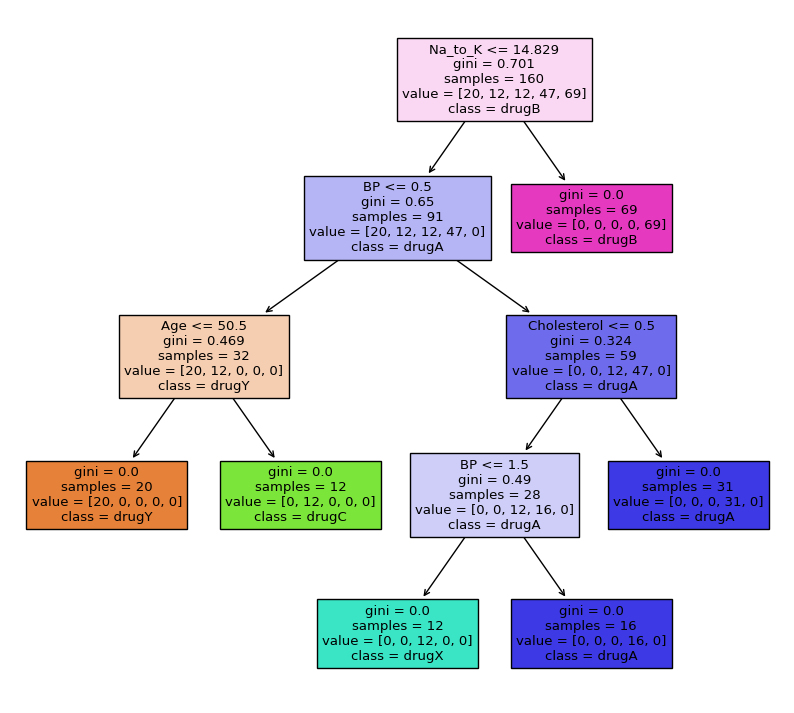

In [26]:
cols=df.drop('Drug', axis=1).columns
classes=df['Drug'].unique()

plt.figure(figsize=(10,9))
plot_tree(tree_model,feature_names=cols, class_names=classes, filled=True)
plt.show()

Random Forest Model

In [28]:
rf_model=RandomForestClassifier(n_estimators=20)
rf_model.fit(xTrain,yTrain)
yPredict=rf_model.predict(xTest)
print(classification_report(yTest,yPredict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00        22

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

